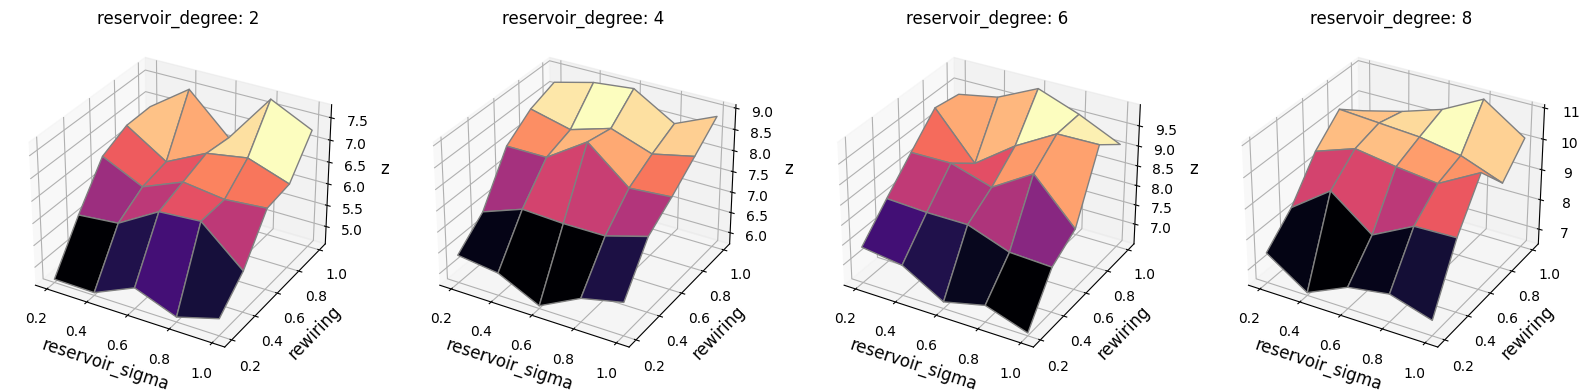

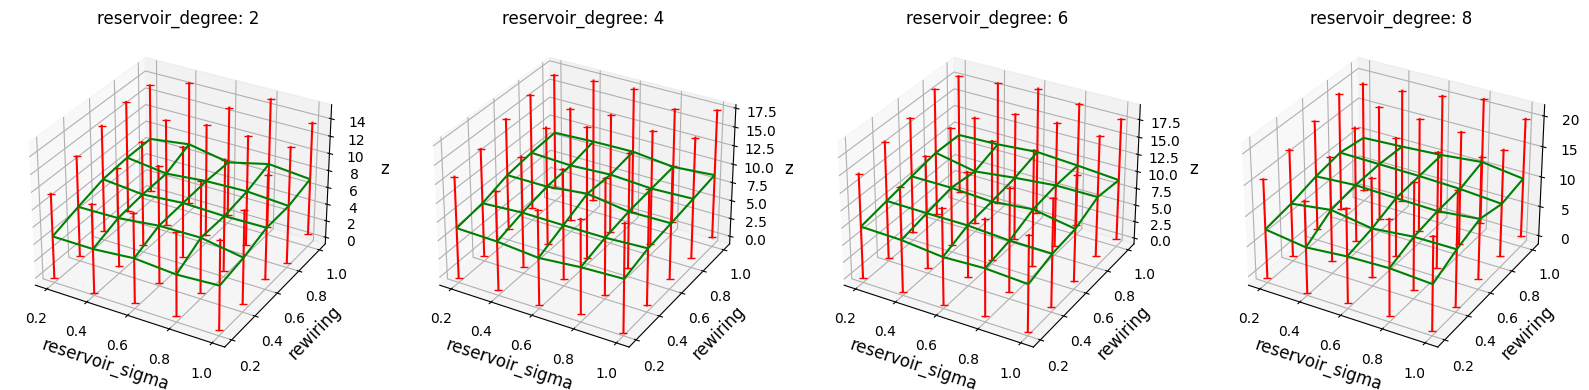

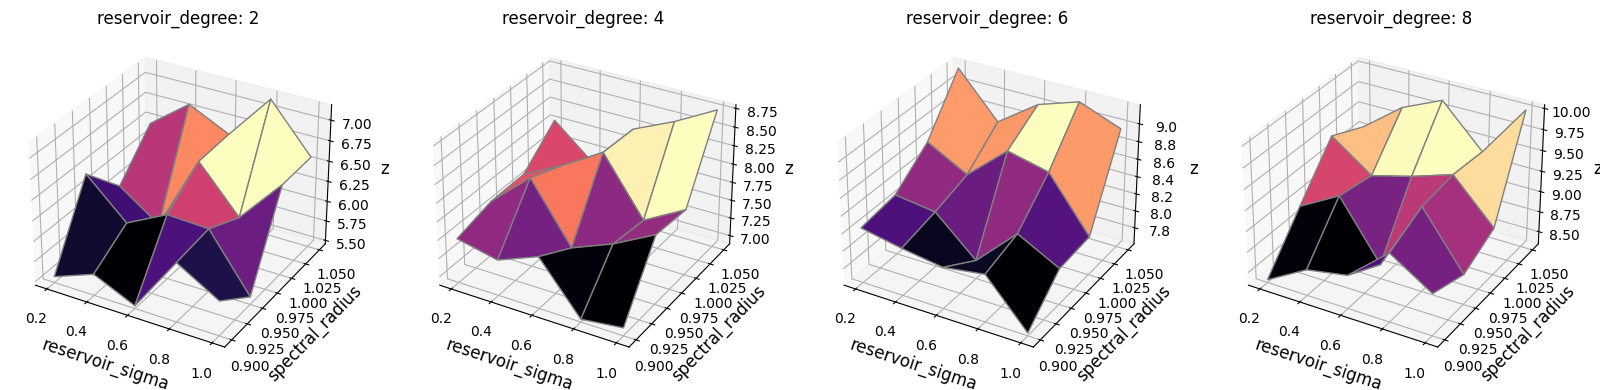

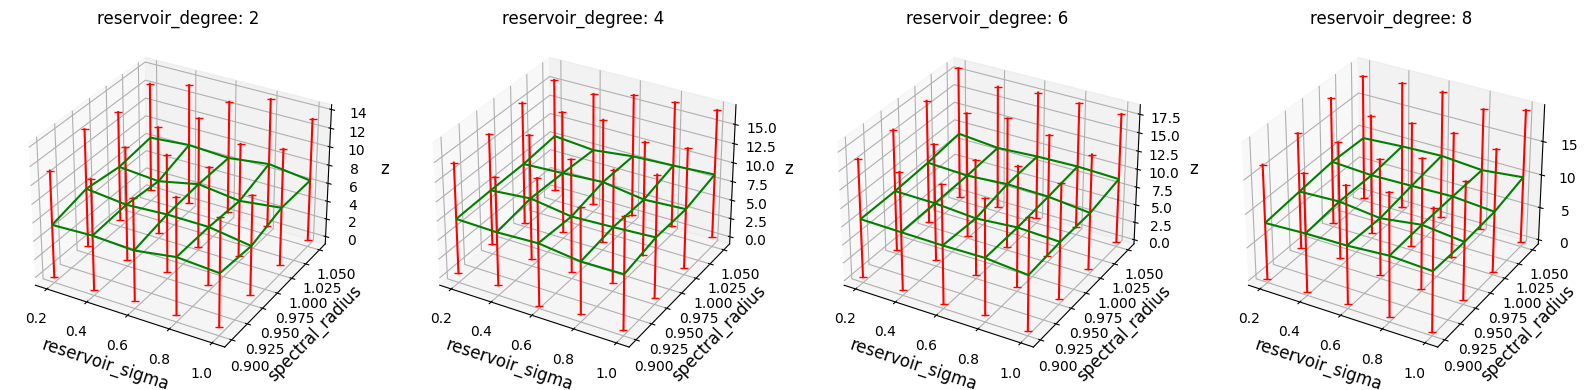

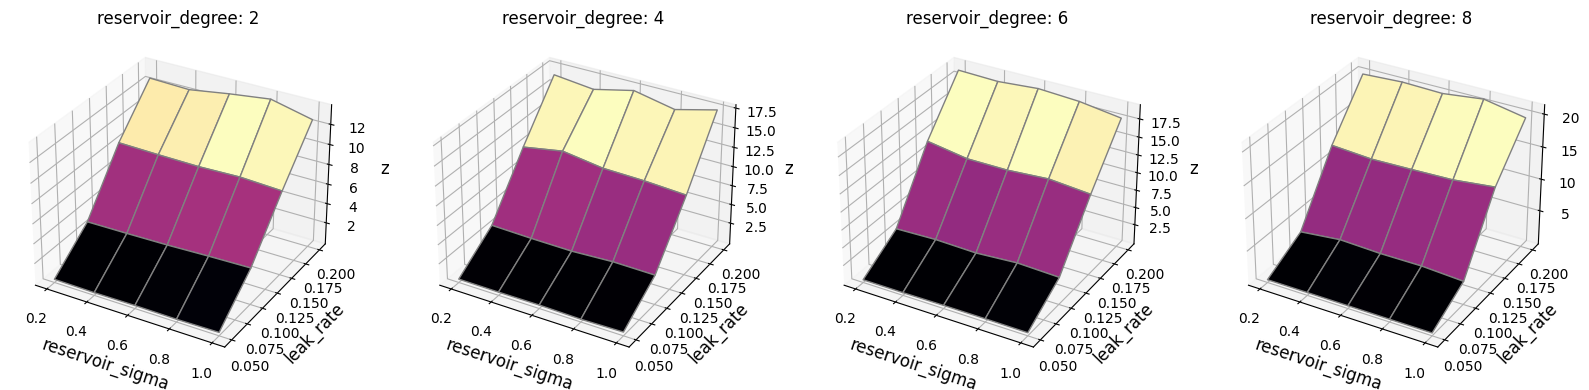

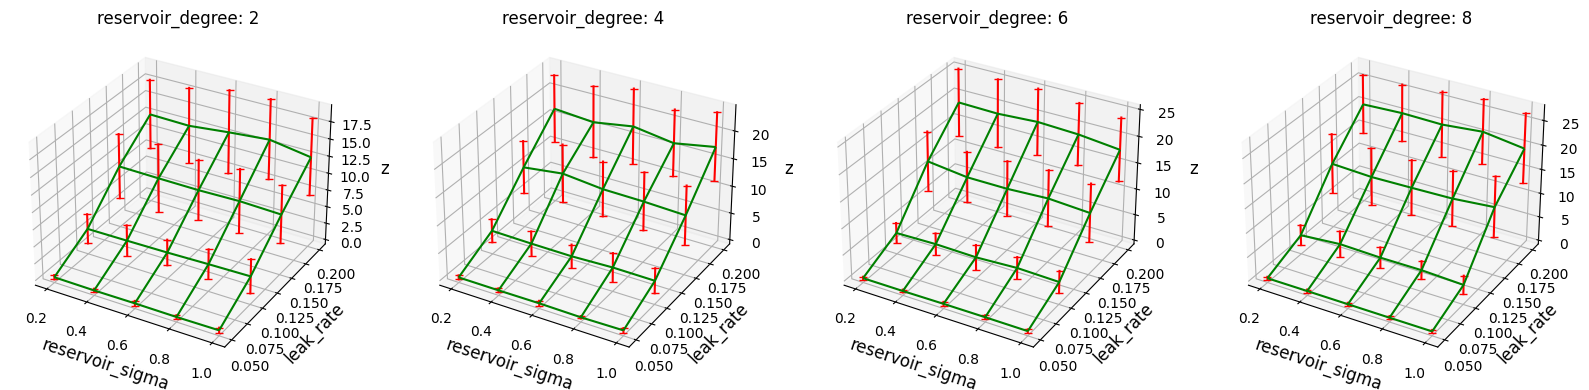

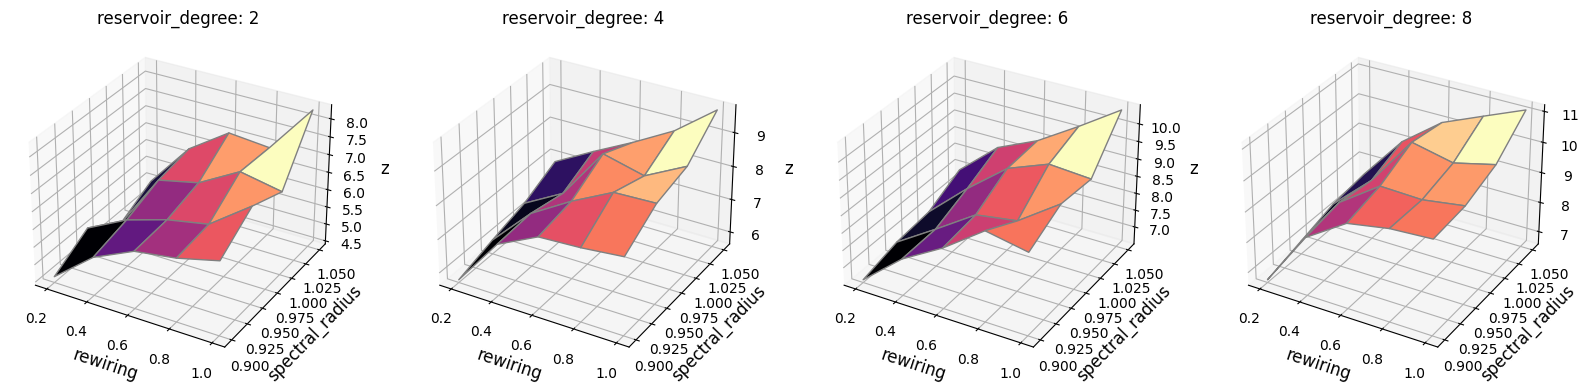

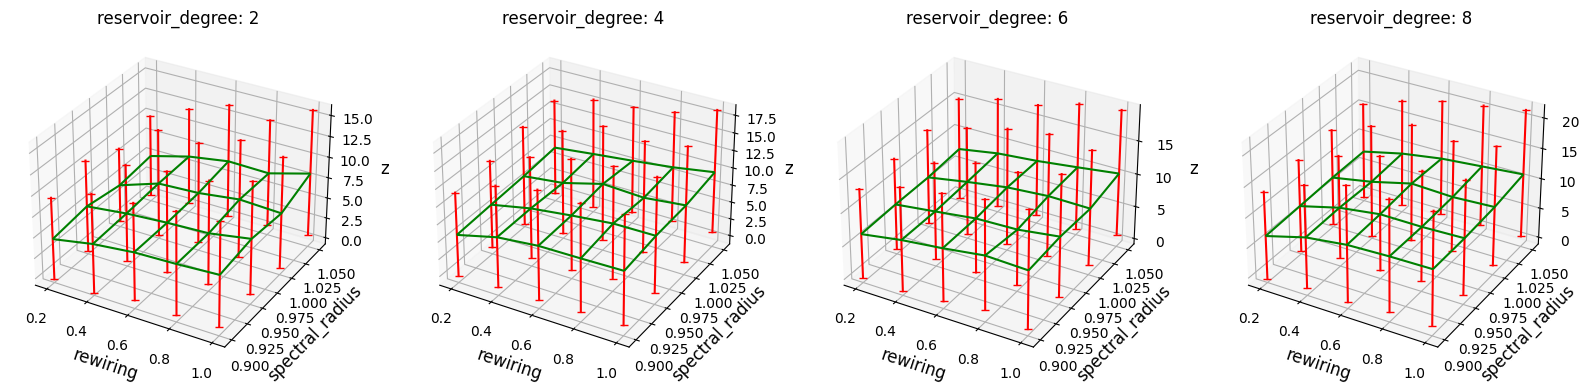

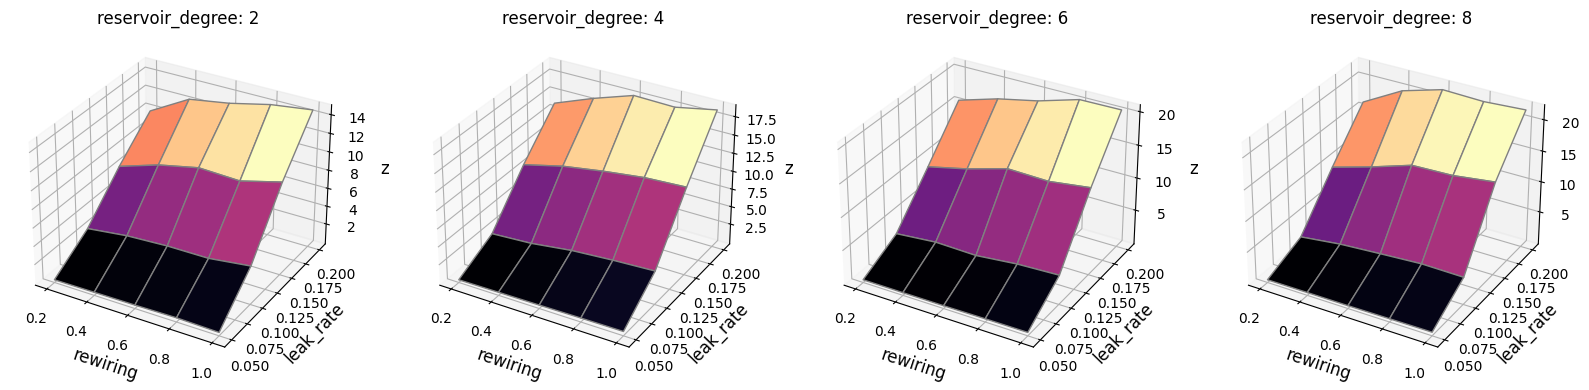

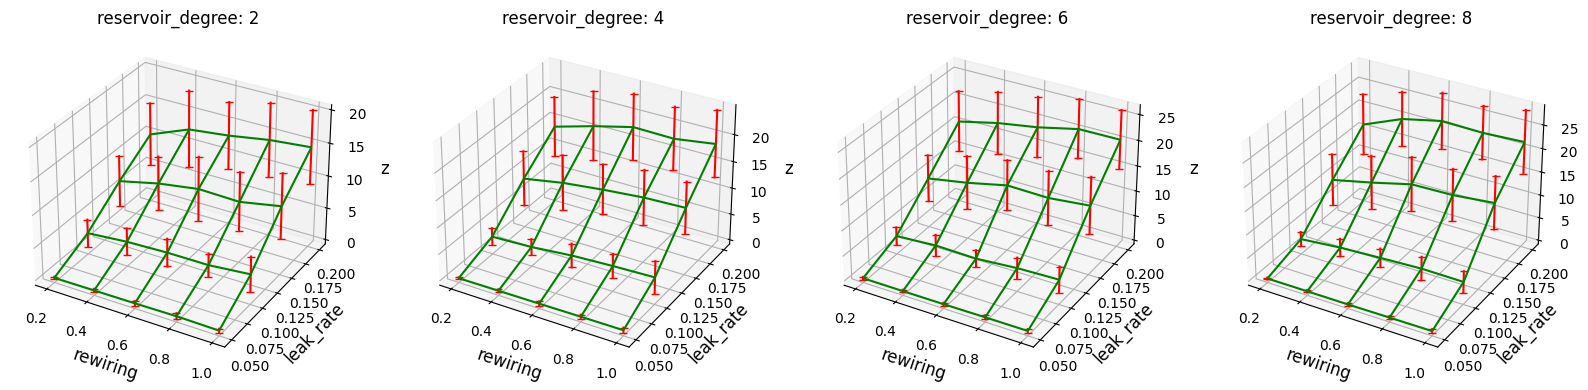

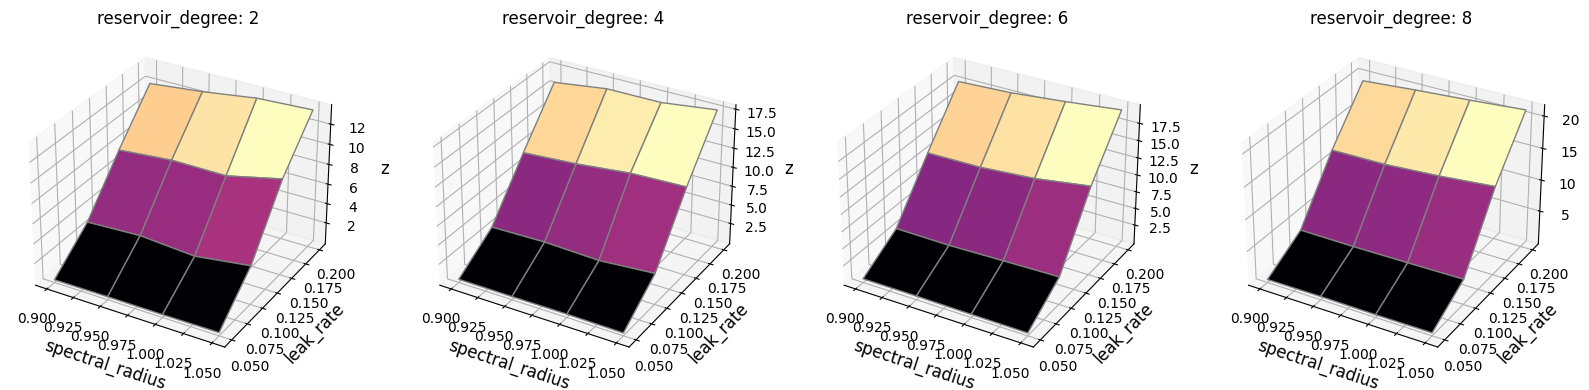

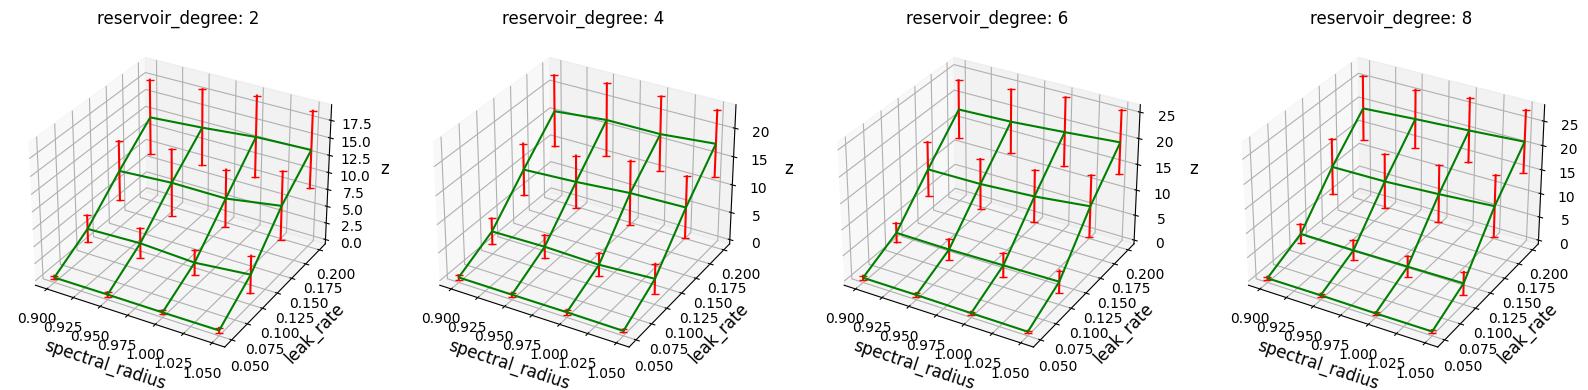

In [2]:
import json
from itertools import combinations

from src.plots.results import plot_params
from src.plots.results import plot_params_by

datapath = '/home/dionisio35/Documents/thesis/results/lorenz_t0.001.json'
params = ['reservoir_sigma', 'rewiring', 'spectral_radius', 'leak_rate',]

plot_params_by(
    datapath=datapath,
    params=params,
    by_param='reservoir_degree',
)

# plot_params(
#     datapath=datapath,
#     params=params,
# )

In [ ]:
cases = list(combinations(['reservoir_sigma', 'rewiring', 'spectral_radius', 'leak_rate',], 2))
# cases = [['reservoir_sigma', 'rewiring'], ['spectral_radius', 'rewiring'], ['regularization', 'rewiring'], ['regularization', 'reservoir_sigma'], ['reservoir_sigma', 'spectral_radius'], ['regularization', 'spectral_radius']]

# open the file
with open(datapath, 'r') as f:
    data = json.load(f)

# # plot of cases
# for case in cases:
#     grouped_data = group_results(case, data)
#     grouped_data = calculate_mean(grouped_data)
#     X, Y, Z, STD = generate_meshgrid(grouped_data)
#     plot_3d(X, Y, Z, case, 'Title')
#     plot_3d_std(X, Y, Z, STD, case)

# # separated plot of reservoir degree
# for case in cases:
#     grouped_data = group_results(list(case)+['reservoir_degree'], data, 'reservoir_degree')
#     for i in sorted(grouped_data.keys()):
#         _data = calculate_mean(grouped_data[i])
#         X, Y, Z, STD = generate_meshgrid(_data)
#         plot_3d(X, Y, Z, case, f'Reservoir degree: {i}')
#         plot_3d_std(X, Y, Z, STD, case)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mackey_glass(P0, beta, gamma, n, tau):
    P = [P0]
    for t in range(1, n):
        P_t_tau = 0 if (t - tau <= 0) else P[t - tau]
        P_next = P[t - 1] + (beta * P_t_tau) / (1 + P_t_tau**gamma) - 0.1 * P[t - 1]
        P.append(P_next)
    return P

# Parameters
P0 = 1.2
beta = 0.2
gamma = 10
n = 2000  # Number of time steps
tau = 1  # Delay parameter

# Generate Mackey-Glass time series
P = mackey_glass(P0, beta, gamma, n, tau)[200:]

# Plotting the attractor
plt.plot(P[:-tau], P[tau:], color='b', lw=.4)

plt.title("$\\tau$ " + str(tau))
plt.xlabel("P(t)")
plt.ylabel("P(t - τ)")
plt.show()